In [2]:
%reload_ext autoreload
%autoreload 2
from IPython import parallel

In [3]:
from IPython import parallel
client = parallel.Client()
lbv = client.load_balanced_view()
dview = client[:]
dview

<DirectView [0, 1, 2, 3,...]>

In [ ]:
%px cd /home/jlevyabi/seacabo/fempl_big_sim/sent_class/Markov_Chains
%px from Perceptron import PerceptronMCMC
%px from Perceptron import PerceptronSA
%px import numpy as np

# __Parameters__

In [3]:
nb_dimensions=50
maximal_nb_iters=2000
number_simulations=100

# MCMC

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from Perceptron import PerceptronMCMC
# First Simulation
a,b=1,0.5
my_perceptron=PerceptronMCMC(n_dim=nb_dimensions,alpha=a,beta=b)
All_W1,All_E1=my_perceptron.avg_simul(maximal_nb_iters,number_simulations)

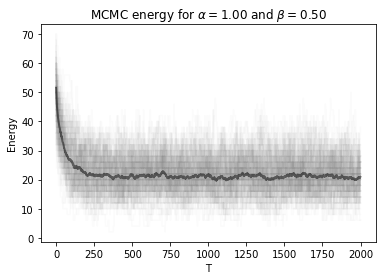

In [9]:
for E_simu in All_E1:
    plt.plot(range(len(E_simu)),E_simu,alpha=0.03,color="grey")
plt.plot(range(maximal_nb_iters),np.mean(All_E1,axis=0),alpha=0.5,color="k",lw=2)
plt.xlabel('T')
plt.ylabel('Energy')
plt.title(r"MCMC energy for $\alpha=%.2f$ and $\beta=%.2f$"%(a,b))
plt.show()

6it [38:58, 377.14s/it]


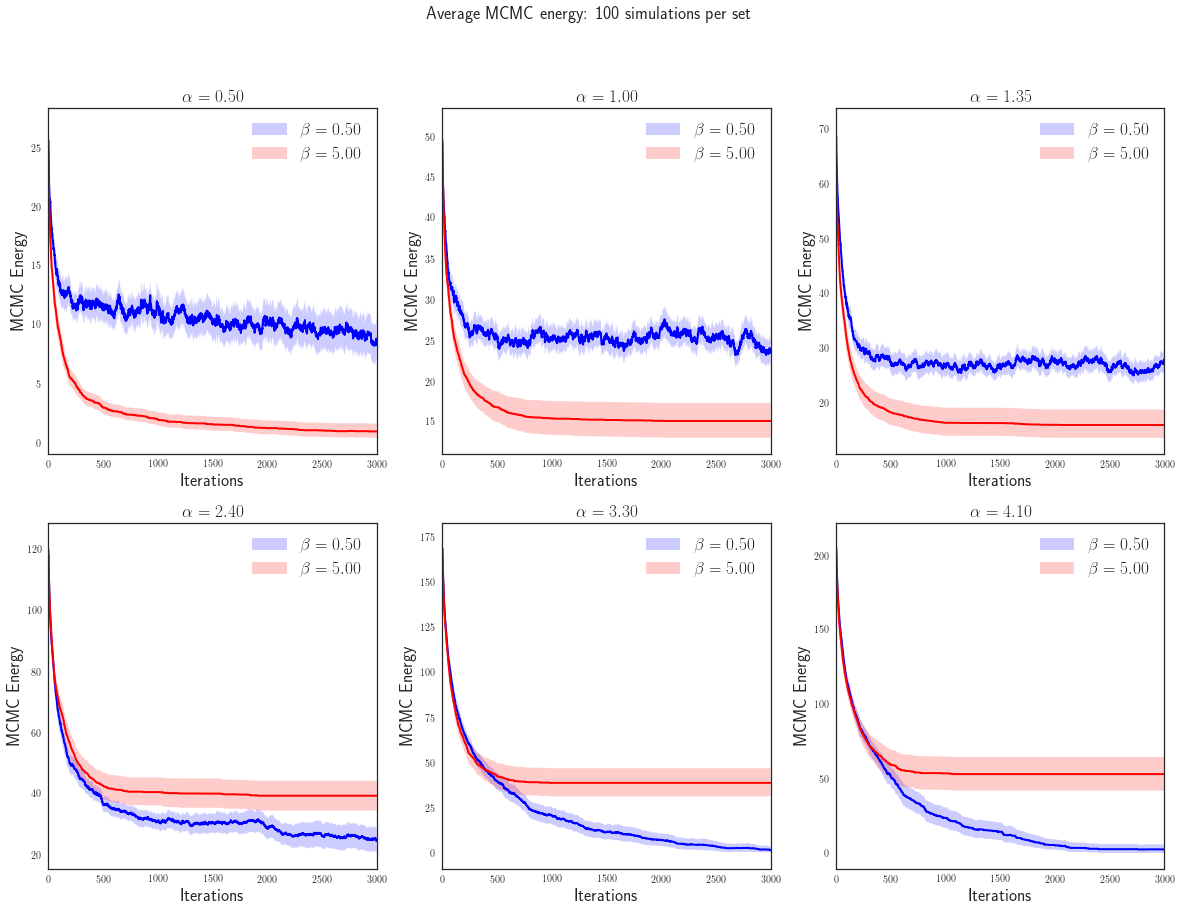

In [6]:
import numpy as np
from tqdm import tqdm
# Second Simulation: Different alphas and betas
import seaborn as sns
sns.set_style("white")
alphas=np.array([0.5,1,1.35,2.4,3.3,4.1])
betas=np.array([0.5,5])
fig=plt.figure(figsize=(20,14))
maximal_nb_iters=3000
co=["blue","red"]
w_real=None
plt.rc('text', usetex=True)

for it_a,alpha in tqdm(enumerate(alphas)): 
    plt.subplot(2,3,1+it_a)
    for it_b,bet in enumerate(betas):
        my_perceptron=PerceptronMCMC(n_dim=nb_dimensions,alpha=alpha,beta=bet,w_real=w_real)
        w_real=my_perceptron.w_real
        A_W,All_E=my_perceptron.avg_simul(maximal_nb_iters,number_simulations)
        sns.tsplot(data=All_E, estimator=np.mean,ci=99,lw=2,color=co[it_b])
    plt.xlabel('Iterations',fontsize="xx-large")
    plt.ylabel('MCMC  Energy',fontsize="xx-large")
    plt.title(r'$\alpha=%.2f$'%alpha,fontsize="xx-large")
    plt.legend(["red","blue"],fontsize="xx-large")
    plt.legend([r"$\beta=%.2f$"%betas[0],r"$\beta=%.2f$"%betas[1]],fontsize="xx-large")
plt.suptitle("Average MCMC energy: %d simulations per set"%(number_simulations),fontsize="xx-large")
plt.savefig("MCMC_phase.pdf")
plt.show()

In [17]:
plt.savefig("test_rasterization.pdf", dpi=150)

In [ ]:
plt.savefig('test.jpg')